- press `Crlt + return` to excute a cell

- press `shift + return` to excute a cell and create a new cell

# import modules

In [1]:
import numpy

a = numpy.arange(0,5)
a

array([0, 1, 2, 3, 4])

ok, I only want to import a specific object(function)

In [2]:
from numpy import arange

a = arange(0,5)
a

array([0, 1, 2, 3, 4])

ok, I need all functions, and I don't want to type numpy

In [3]:
from numpy import *

a = arange(0,5)
a

array([0, 1, 2, 3, 4])

and this is very dangerous because in defferent modules we might have same function names, but we still don't want to type the full module name since in some case the module name may be like this: **ThisIsAVeryLongModuleName**. then we can do it this way

In [4]:
import numpy as np

a = np.arange(0,5)
a

array([0, 1, 2, 3, 4])

# asking for help

to search a function you want, the best way is asking documentation for help, or you can

In [ ]:
# press tab
np.

In [ ]:
# press tab
np.arange

In [6]:
# only for numpy
np.lookfor("create array")

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

if you want the usage of some functions, the best way is also to ask documentation for help, but for people as lazy as me, the default way is `help()`

In [7]:
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

but in the notebook you can do this

In [9]:
np.arange?

In [ ]:
# press shift+tab
np.arange()

# with *numpy* you can ...

In [10]:
import numpy as np

## vectorized operation

In [11]:
v1 = np.array([1,2,3,4,5])
v2 = np.array([1,1,1,1,1])

vectorized product

In [12]:
v1*v2

array([1, 2, 3, 4, 5])

## vector algebra
dot product

In [13]:
# functional way
np.dot(v1, v2)

15

In [14]:
# object oriented way
v1.dot(v2)

15

## simple statistics

In [15]:
v2

array([1, 1, 1, 1, 1])

In [16]:
v2.max(), v2.mean(), v2.min(), v2.std()

(1, 1.0, 1, 0.0)

## else

[https://docs.scipy.org/doc/numpy-dev/reference/index.html#reference](https://docs.scipy.org/doc/numpy-dev/reference/index.html#reference)

# with *matplotlib* you can ...

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

simple plot

In [20]:
a = np.arange(0, 2*np.pi, 2*np.pi/100)
b = np.sin(a)

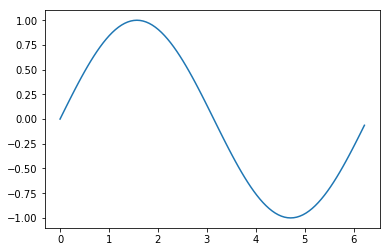

In [21]:
plt.plot(a, b);

ok this is just a simple plot which seems to be not beatiful.

we can change the style with a 2-line code

In [22]:
from matplotlib import style
style.use('ggplot')      # R style plot

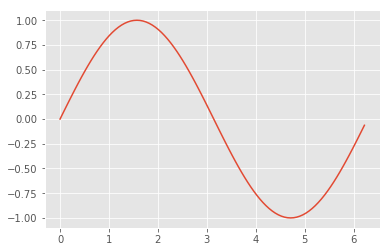

In [23]:
plt.plot(a, b);

someone may think it a dead plot which means we are just working with a image. And they need interactive plot

In [26]:
%matplotlib tk

In [27]:
plt.plot(a, b)
plt.show()

# with *scipy* you can ...

[https://docs.scipy.org/doc/scipy/reference/#tutorial](https://docs.scipy.org/doc/scipy/reference/#tutorial)

for example, the integration

In [28]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

ok, but you don't understand the result. then go to

[https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)

and for example the least-square fitting

In [29]:
from scipy.optimize import least_squares

define a model

In [30]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

define a loss function

In [31]:
def fun(x, u, y):
    return model(x, u) - y

if we are able to calculate the jacobian matrix

In [32]:
def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

and the fitting result

In [33]:
# independent variables
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1, 8.33e-2, 7.14e-2, 6.25e-2])

# observed variables
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2, 4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])

# initial model parameters
x0 = np.array([2.5, 3.9, 4.15, 3.9])

In [34]:
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 130, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.92e-08.


In [35]:
res.x

array([0.19280596, 0.19130423, 0.12306063, 0.13607247])

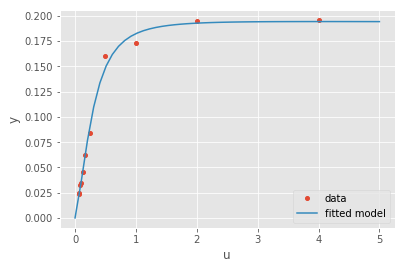

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right');

# with *pandas* you can ...

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('test.csv')
df

,name,age,gender
0,John,17,male
1,Peter,20,male
2,Allen,21,female
3,Rain,22,male
4,Marry,25,female


In [39]:
df['age']

0    17
1    20
2    21
3    22
4    25
Name: age, dtype: int64

In [40]:
df['age'].describe()

count     5.000000
mean     21.000000
std       2.915476
min      17.000000
25%      20.000000
50%      21.000000
75%      22.000000
max      25.000000
Name: age, dtype: float64

In [41]:
df.groupby('gender')['age'].count()

gender
female    2
male      3
Name: age, dtype: int64

In [42]:
df.groupby('gender')['age'].max()

gender
female    25
male      22
Name: age, dtype: int64

# with *sympy* you can ...

In [43]:
import sympy as sym
sym.init_printing() 

In [44]:
x = sym.Symbol('x')
y = sym.Symbol('y')

In [45]:
x + y + x - y

In [46]:
sym.expand((x + y) ** 3)

In [47]:
sym.expand(sym.cos(x + y), trig=True)

In [48]:
sym.limit(sym.sin(x) / x, x, 0)

In [49]:
sym.limit(1 / x, x, sym.oo)

In [50]:
f = sym.sin(2 * x)
sym.diff(f, x, 1), sym.diff(f, x, 2), sym.diff(f, x, 3)

# with *sunpy* you can ...

too long ..., and sunpy is still under development

---

after all, to see what you have defined

In [51]:
%whos

Variable                    Type                          Data/Info
-------------------------------------------------------------------
ALLOW_THREADS               int                           1
AxisError                   type                          <class 'numpy.core._internal.AxisError'>
BUFSIZE                     int                           8192
CLIP                        int                           0
ComplexWarning              type                          <class 'numpy.core.numeric.ComplexWarning'>
DataSource                  type                          <class 'numpy.lib._datasource.DataSource'>
ERR_CALL                    int                           3
ERR_DEFAULT                 int                           521
ERR_IGNORE                  int                           0
ERR_LOG                     int                           5
ERR_PRINT                   int                           4
ERR_RAISE                   int                           2
ERR_WARN         

flatnonzero                 function                      <function flatnonzero at 0x10af18d90>
flexible                    type                          <class 'numpy.flexible'>
flip                        function                      <function flip at 0x10b0191e0>
fliplr                      function                      <function fliplr at 0x10affc950>
flipud                      function                      <function flipud at 0x10affc9d8>
float128                    type                          <class 'numpy.float128'>
float16                     type                          <class 'numpy.float16'>
float32                     type                          <class 'numpy.float32'>
float64                     type                          <class 'numpy.float64'>
float_                      type                          <class 'numpy.float64'>
float_power                 ufunc                         <ufunc 'float_power'>
floating                    type                          <